In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr
import math

In [5]:
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
df.set_index('state', inplace = True)
df

,metro_res,white,hs_grad,poverty,female_house
state,,,,,
Alabama,55.4,71.3,79.9,14.6,14.2
Alaska,65.6,70.8,90.6,8.3,10.8
Arizona,88.2,87.7,83.8,13.3,11.1
Arkansas,52.5,81.0,80.9,18.0,12.1
California,94.4,77.5,81.1,12.8,12.6
Colorado,84.5,90.2,88.7,9.4,9.6
Connecticut,87.7,85.4,87.5,7.8,12.1
Delaware,80.1,76.3,88.7,8.1,13.1
District of Columbia,100.0,36.2,86.0,16.8,18.9


# Регрессия с одной переменной

In [3]:
df['poverty'].corr(df['hs_grad'])

-0.7468582531582505

Text(0, 0.5, 'Бедность (%)')

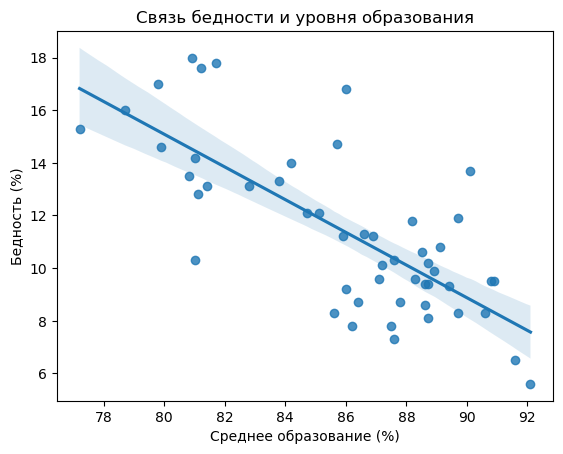

In [4]:
#Рисуем диаграмму рассеивания (сразу с линией регрессии)
sns.regplot(
    x = 'hs_grad',
    y = 'poverty',
    data = df,
).set(title = 'Связь бедности и уровня образования')
plt.xlabel('Среднее образование (%)')
plt.ylabel('Бедность (%)')

In [5]:
df[['hs_grad', 'poverty']].describe()

,hs_grad,poverty
count,51.000000,51.000000
mean,86.011765,11.349020
std,3.725998,3.099185
min,77.200000,5.600000
25%,83.300000,9.250000
50%,86.900000,10.600000
75%,88.700000,13.400000
max,92.100000,18.000000


In [6]:
y = df['poverty']
x = df[['hs_grad']]
x = sm.add_constant (x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           3.11e-10
Time:                        19:36:07   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7810      6.803      9.523      0.000      51.111      78.451
hs_grad       -0.6212      0.079     -7.862      0.000      -0.780      -0.462
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.653
Skew:                           0.540   Prob(JB):                        0.265
Kurtosis:                       3.289   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Выводы
1. Наша модель y = 64.78 - 0.62x
2. R^2 = 0.558; Также мы можем отклонить H0 о том, что в ГС b1 = 0, так как р-уровень значимости для b1 сильно меньше 0.05

In [ ]:
sns.residplot(
    data = df,
    x = 'hs_grad',
    y = 'poverty',
    lowess=False,
    robust=False,
).set(title = 'График остатков')
plt.show()

In [ ]:
# Assuming 'model' is your fitted regression model
residuals = model.resid

# Plotting
sm.qqplot(residuals, line='s')
plt.title("Normal Q-Q Plot")
plt.show()

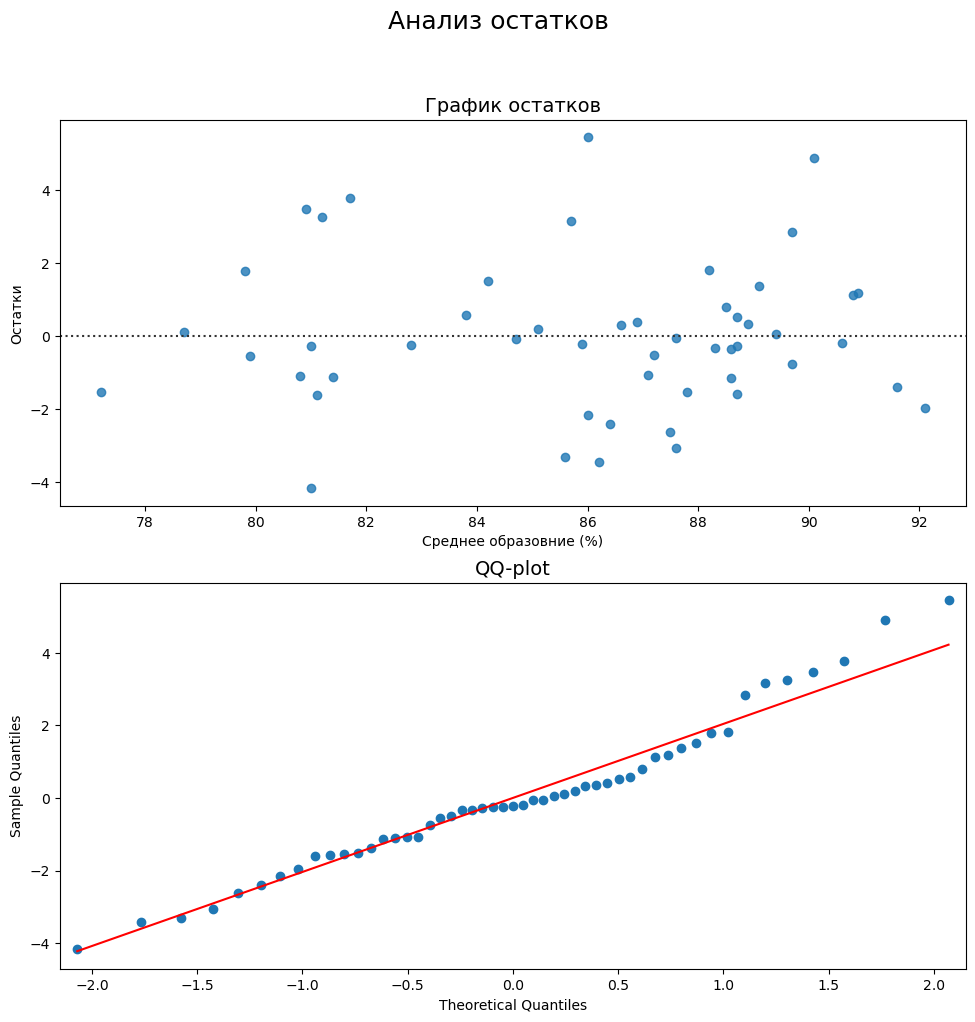

In [8]:
INCH = 25.4
fig = plt.figure(figsize=(297/INCH, 420/INCH/1.5))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
title_figure = 'Анализ остатков'
fig.suptitle(title_figure, fontsize = 18)
title_axes_1 = 'График остатков'
ax1.set_title(title_axes_1, fontsize = 14)
order_mod = 1
sns.residplot(
    data = df,
    x = 'hs_grad',
    y = 'poverty',
    lowess=False,
    robust=False,
    ax=ax1
)
ax1.set_ylabel('Остатки')
ax1.set_xlabel('Среднее образовние (%)')

residuals = model.resid
sm.qqplot(residuals, line='s', ax=ax2)
title_axes_2 = 'QQ-plot'
ax2.set_title(title_axes_2, fontsize = 14)
plt.show()


# Анализ остатков
1. Судя по графику остатков, требование гомоскедастичности выполнено
2. Судя по графику QQ_plot, требование к нормальности распределения остатков тоже выполнено

# Единая функция 

In [10]:
def do_ols(x, y):
    x_for_ols = sm.add_constant(x)
    model = sm.OLS(y, x_for_ols)
    results = model.fit()
    print('statsmodels: ', results.summary())
    
    # regression formula --------------------------------
    if results.params[1]>0:
        sign="+"
    else:
        sign="-"
    formula = f"y = {results.params[0]:.2f} {sign} {np.abs(results.params[1]):.2f}*x"
    print("-"*80)
    print("OLS Formula: ", formula)

    # Graphics ================================
    fig = plt.figure(figsize=(16,9), constrained_layout=True)
    gs = fig.add_gridspec(ncols=3, nrows=2)
    ax_main = fig.add_subplot(gs[0,:])
    ax_resid = fig.add_subplot(gs[1,0])
    ax_hist = fig.add_subplot(gs[1,1])
    ax_qqplot = fig.add_subplot(gs[1,2])

    # Scatterplot -----------------------------
    sns.scatterplot(x=x, y=y, ax=ax_main, label="fact")
    ax_main.plot(x, results.predict(), color='red', alpha=0.5, label = formula)
    ax_main.set_title(f"Regression scatterplot. R2={results.rsquared:.2f}", fontsize=14)
    ax_main.legend()

    # Residuals -------------------------------
    sns.scatterplot(x=x, y=results.resid, ax=ax_resid, label="residuals")
    ax_resid.hlines(0, x.min(), x.max(), linestyle='--', colors='red', alpha=0.5)
    ax_resid.set_title(f"Residuals vs Fitted values", fontsize=14)

    # Hist -------------------------------------
    sns.histplot(results.resid, ax=ax_hist,)
    ax_hist.set_title("Histogram of Residuals", fontsize=14)
    # ax_hist.legend()

    # QQ Plot ----------------------------------
    # sm.qqplot(results.resid, ax=ax_qqplot) # не такой секси
    stats.probplot(results.resid, dist="norm", plot=ax_qqplot)
    ax_qqplot.set_title("Normal QQ-Plot of Residuals", fontsize=14)

    plt.show()

statsmodels:                              OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           3.11e-10
Time:                        19:51:28   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7810      6.803      

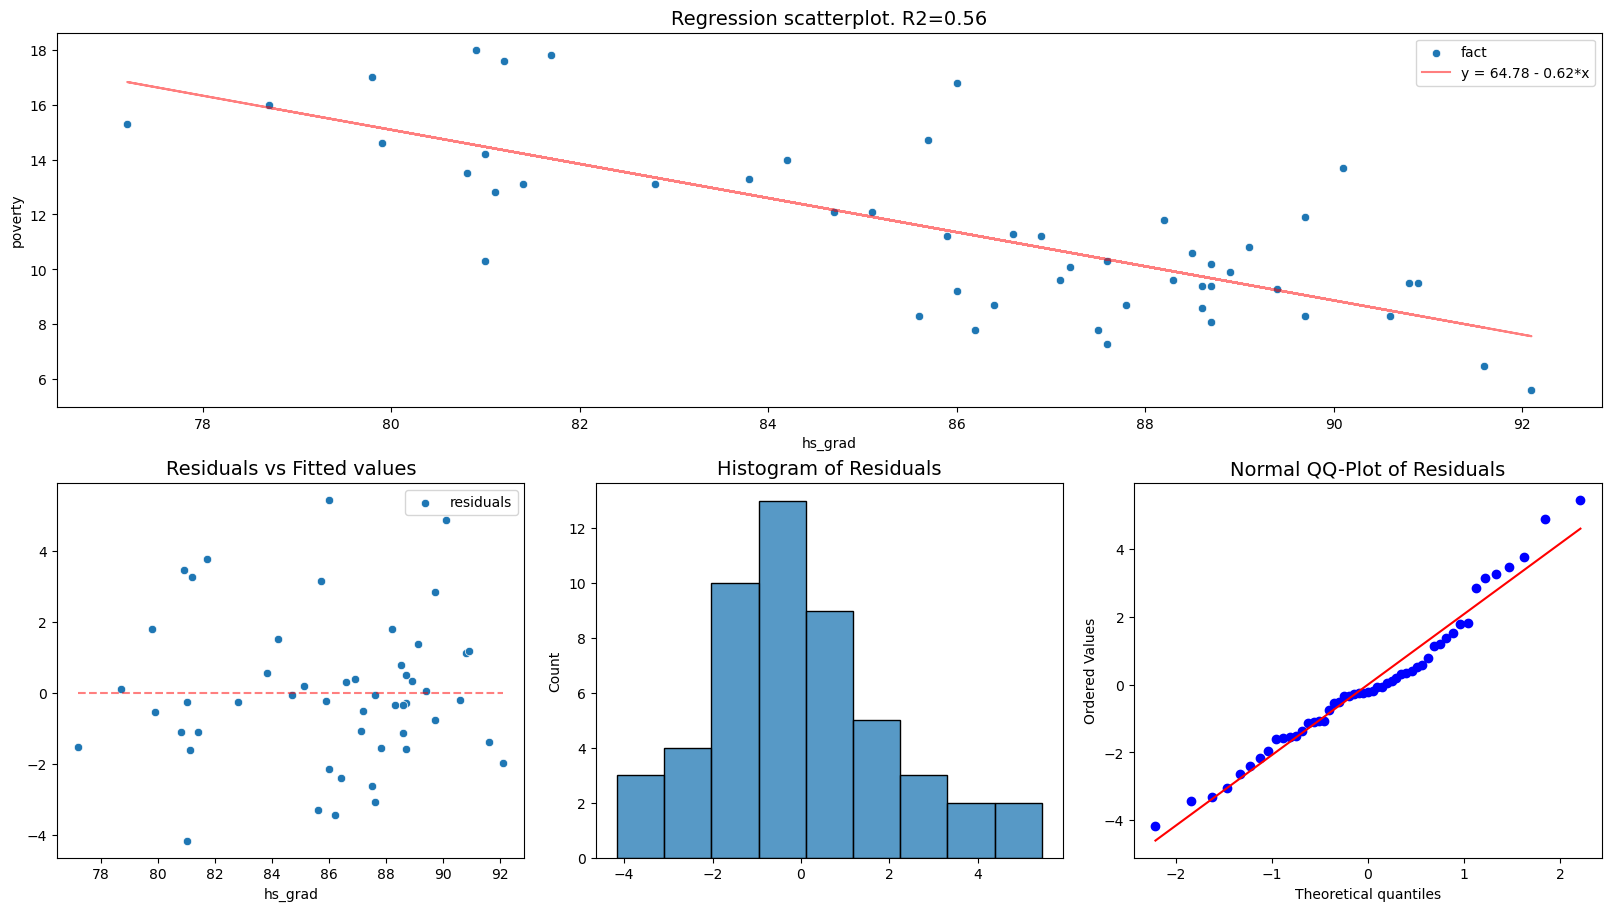

In [11]:
do_ols(df['hs_grad'], df['poverty'])

# Множественная регрессия

In [3]:
y = df['poverty']
x = df[['metro_res', 'white', 'hs_grad', 'female_house']]
x_OLS = sm.add_constant(x)
model = sm.OLS(y, x_OLS).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           8.88e-10
Time:                        14:13:22   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           66.4765     12.590      5.280   

# Выбор наилучшей модели

[[ 1.         -0.34244157  0.01811049 -0.20423477  0.3000617 ]
 [-0.34244157  1.          0.23815607 -0.30852007 -0.75139437]
 [ 0.01811049  0.23815607  1.         -0.74685825 -0.61186726]
 [-0.20423477 -0.30852007 -0.74685825  1.          0.52539698]
 [ 0.3000617  -0.75139437 -0.61186726  0.52539698  1.        ]]
                                                metro_res  \
metro_res                       (0.9999999999999999, 0.0)   
white         (-0.3424415681020582, 0.013902727539279075)   
hs_grad         (0.01811048737194229, 0.8996221639078869)   
poverty       (-0.20423476556056963, 0.15055556587170557)   
female_house   (0.30006169594542487, 0.03241042400487433)   

                                                      white  \
metro_res       (-0.3424415681020582, 0.013902727539279075)   
white                                            (1.0, 0.0)   
hs_grad          (0.23815607487800186, 0.09239036218653776)   
poverty         (-0.3085200686353027, 0.027616394900656753)   
fe

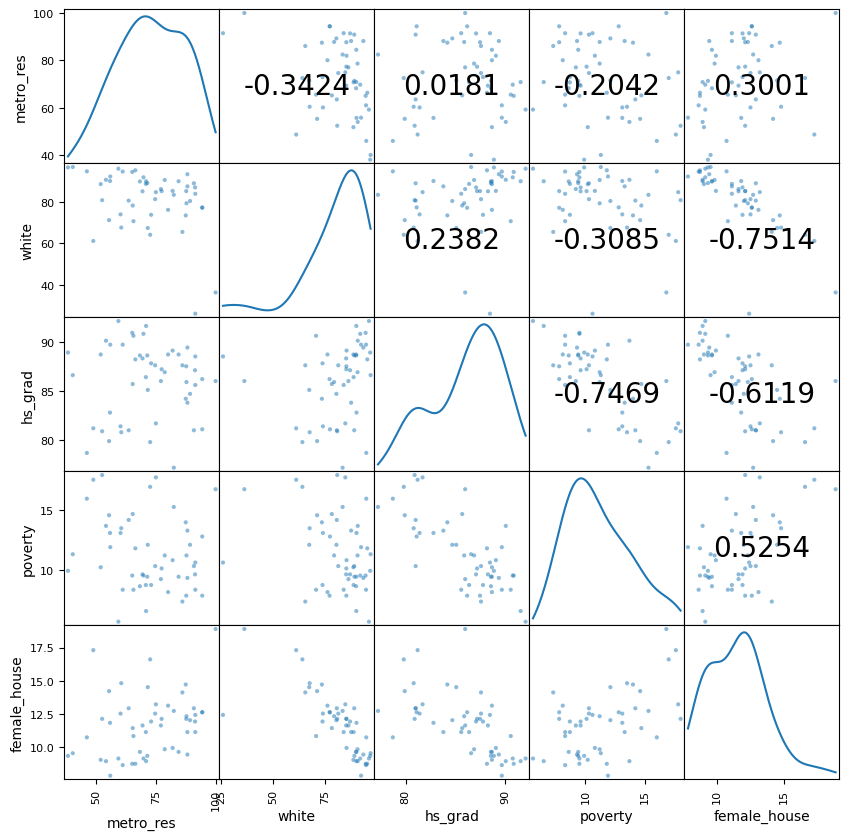

In [4]:
data = pd.read_csv(
    'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
print(corr)
def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = pearsonr(tmp[r], tmp[c])
    return p
print(r_pvalues(df))
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.4f" %corr[i,j], (0.5, 0.5), xycoords='axes fraction', fontsize = 20, ha='center', va='center')
plt.show()

[[ 1.         -0.34244157  0.01811049 -0.20423477  0.3000617 ]
 [-0.34244157  1.          0.23815607 -0.30852007 -0.75139437]
 [ 0.01811049  0.23815607  1.         -0.74685825 -0.61186726]
 [-0.20423477 -0.30852007 -0.74685825  1.          0.52539698]
 [ 0.3000617  -0.75139437 -0.61186726  0.52539698  1.        ]]


TypeError: unsupported operand type(s) for +: 'float' and 'str'

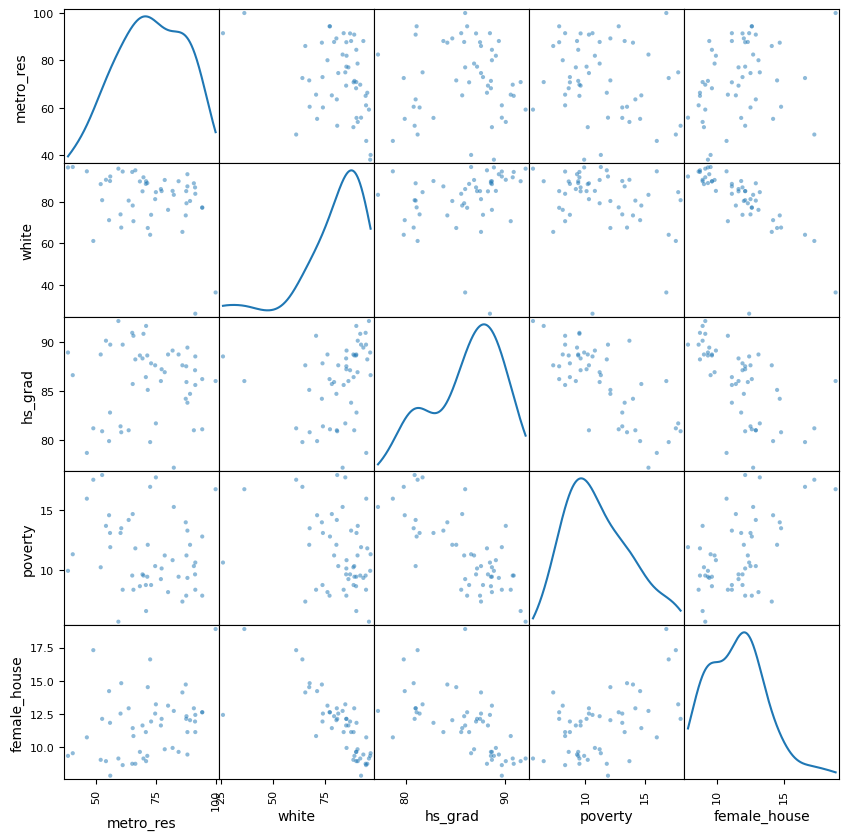

In [4]:
data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
print(corr)
def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = pearsonr(tmp[r], tmp[c])
    return p
corr = r_pvalues(df)
print(corr)
print(type(corr))
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    print(corr.iloc[i, j])
    axes[i, j].annotate("%.2f" %corr.iloc[i, j][0], (0.5, 0.5), xycoords='axes fraction', fontsize = (1-corr.iloc[i,j][1])*30, ha='center', va='center')
plt.show()

In [10]:
y = df['poverty']
x = df[['metro_res', 'white', 'hs_grad']]
x_OLS = sm.add_constant(x)
model = sm.OLS(y, x_OLS).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.55e-10
Time:                        14:16:23   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.7220      6.389     10.756      0.0

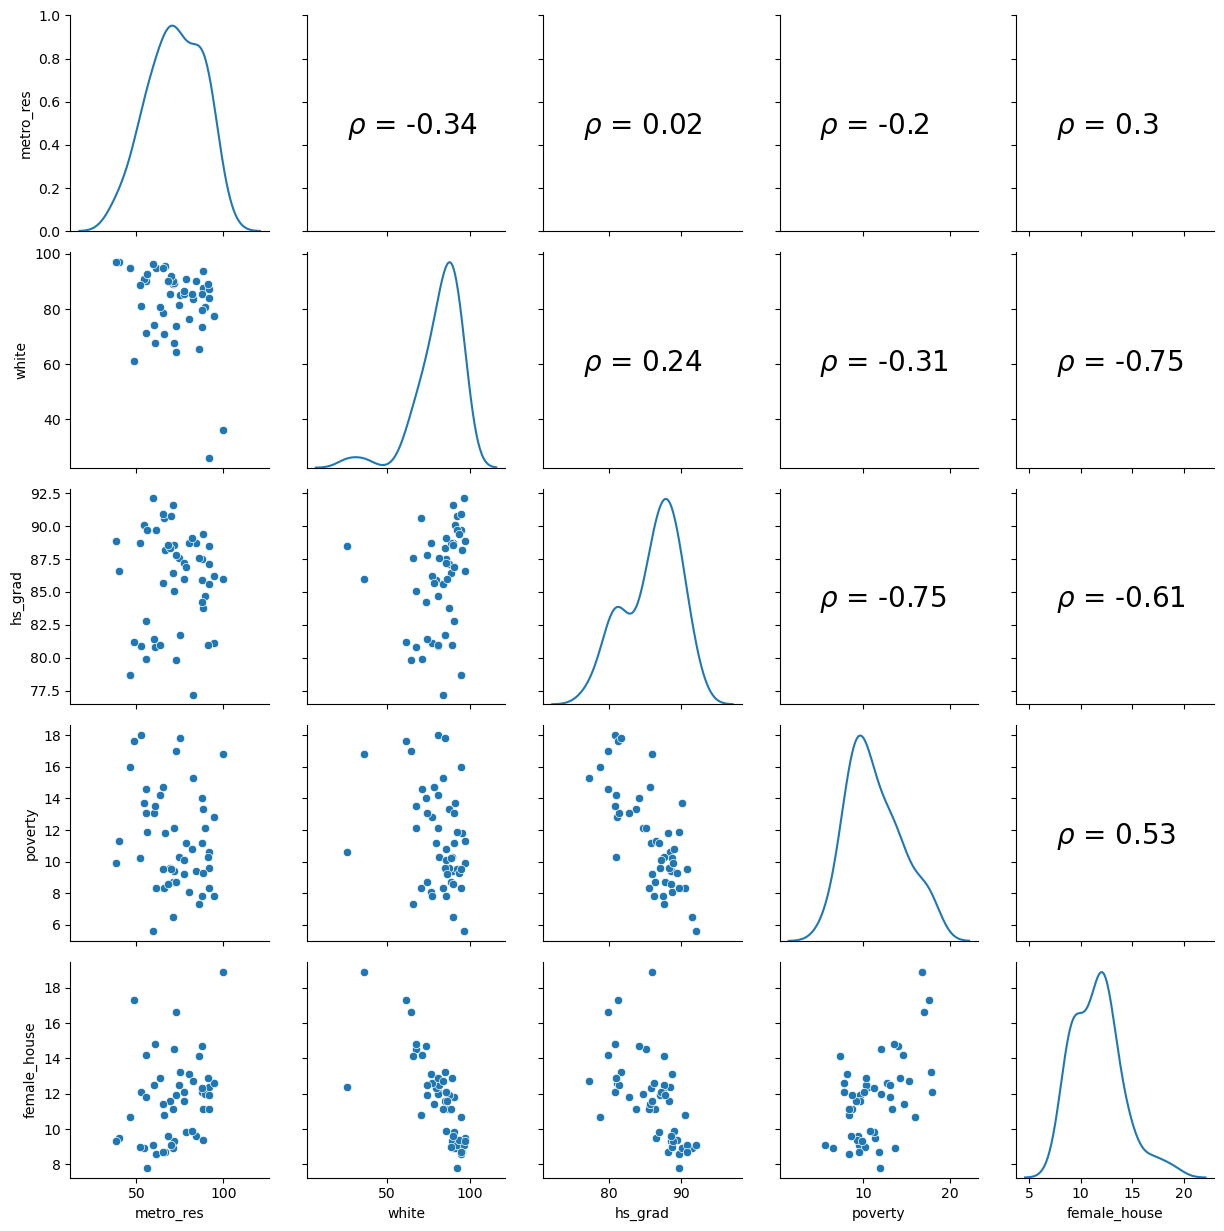

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.45), size = 20, xycoords = ax.transAxes)

g = sns.PairGrid(df, diag_sharey=False)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

ValueError: Data must be 1-dimensional

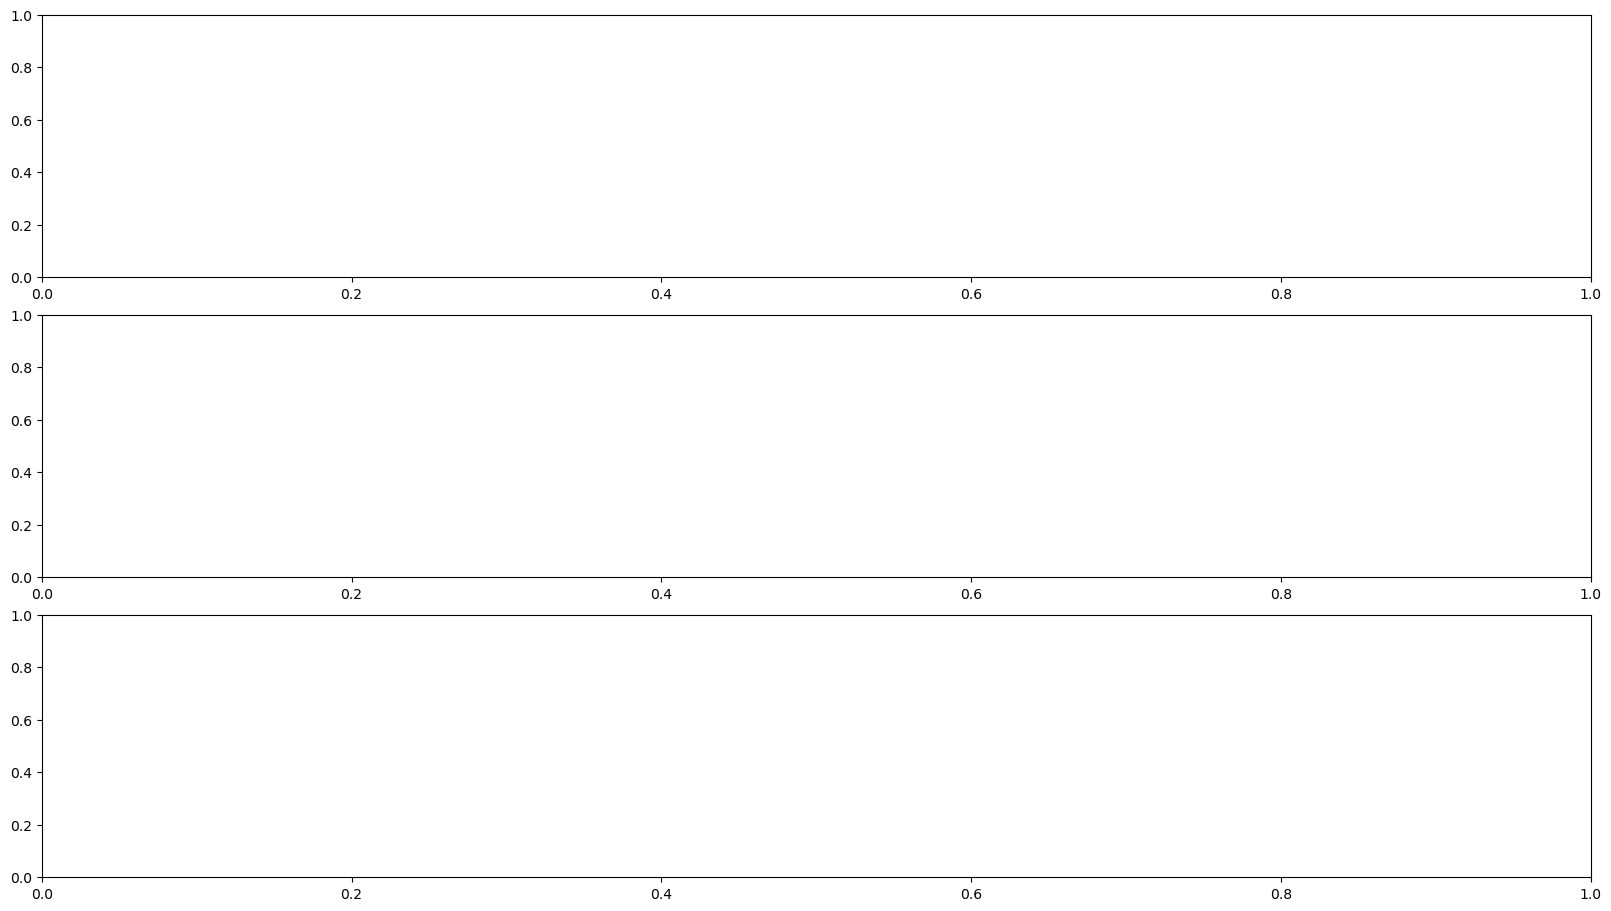

In [11]:
results = model
fig = plt.figure(figsize=(16,9), constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=3)
ax_resid = fig.add_subplot(gs[0,0])
ax_hist = fig.add_subplot(gs[1,0])
ax_qqplot = fig.add_subplot(gs[2,0])

sns.scatterplot(x=x, y=results.resid, ax=ax_resid, label="residuals")
ax_resid.hlines(0,  x.min(), x.max(), linestyle='--', colors='red', alpha=0.5)
ax_resid.set_title(f"Residuals vs Fitted values", fontsize=14)

# Hist -------------------------------------
sns.histplot(results.resid, ax=ax_hist,)
ax_hist.set_title("Histogram of Residuals", fontsize=14)
# ax_hist.legend()
# QQ Plot ----------------------------------
# sm.qqplot(results.resid, ax=ax_qqplot) # не такой секси
stats.probplot(results.resid, dist="norm", plot=ax_qqplot)
ax_qqplot.set_title("Normal QQ-Plot of Residuals", fontsize=14)